In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('car_web_scraped_dataset.csv')

# Exploring the Dataset and Feature Engineering

In [3]:
df.head()

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2840 non-null   object
 1   year       2840 non-null   int64 
 2   miles      2840 non-null   object
 3   color      2840 non-null   object
 4   condition  2840 non-null   object
 5   price      2840 non-null   object
dtypes: int64(1), object(5)
memory usage: 133.3+ KB


In [5]:
df['miles'].unique()

array(['41,406 miles', '15,138 miles', '32,879 miles', ...,
       '27,894 miles', '50,220 miles', '26,510 miles'], dtype=object)

In [6]:
df['miles'].value_counts()

miles
25 miles         5
55 miles         4
22,045 miles     3
27,681 miles     3
20,280 miles     3
                ..
106,742 miles    1
48,726 miles     1
9,620 miles      1
20,357 miles     1
26,510 miles     1
Name: count, Length: 2280, dtype: int64

In [7]:
df['miles'] = df['miles'].str.replace('miles', '')

In [8]:
df['miles'].head()

0    41,406 
1    15,138 
2    32,879 
3    37,190 
4    27,496 
Name: miles, dtype: object

In [9]:
df['miles'] = df['miles'].str.replace(',','')

In [10]:
df['miles'].head()

0    41406 
1    15138 
2    32879 
3    37190 
4    27496 
Name: miles, dtype: object

In [11]:
df['miles'] = df['miles'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2840 non-null   object
 1   year       2840 non-null   int64 
 2   miles      2840 non-null   int64 
 3   color      2840 non-null   object
 4   condition  2840 non-null   object
 5   price      2840 non-null   object
dtypes: int64(2), object(4)
memory usage: 133.3+ KB


In [13]:
df.isnull().sum()

name         0
year         0
miles        0
color        0
condition    0
price        0
dtype: int64

In [14]:
df[['accidents', 'owners']] = df['condition'].str.split(',', expand= True)

In [15]:
df.head()

,name,year,miles,color,condition,price,accidents,owners
0,Kia Forte,2022,41406,"Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988",No accidents reported,1 Owner
1,Chevrolet Silverado 1500,2021,15138,"White exterior, Black interior","1 accident reported, 1 Owner","$38,008",1 accident reported,1 Owner
2,Toyota RAV4,2022,32879,"Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988",No accidents reported,1 Owner
3,Honda Civic,2020,37190,"Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998",No accidents reported,1 Owner
4,Honda Civic,2020,27496,"Black exterior, Black interior","No accidents reported, 1 Owner","$19,498",No accidents reported,1 Owner


In [16]:
df['owners'].unique()

array([' 1 Owner', ' 3 Owners', ' 2 Owners', ' 5 Owners', ' 4 Owners',
       ' 0 Owners', ' 7 Owners', ' 8 Owners'], dtype=object)

In [17]:
df['owners'] = df['owners'].str.replace(r'\D', '', regex=True)

In [18]:
df['owners'].head()

0    1
1    1
2    1
3    1
4    1
Name: owners, dtype: object

In [19]:
df['owners'].unique()

array(['1', '3', '2', '5', '4', '0', '7', '8'], dtype=object)

In [20]:
df['owners'] = df['owners'].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2840 non-null   object
 1   year       2840 non-null   int64 
 2   miles      2840 non-null   int64 
 3   color      2840 non-null   object
 4   condition  2840 non-null   object
 5   price      2840 non-null   object
 6   accidents  2840 non-null   object
 7   owners     2840 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 177.6+ KB


In [22]:
df['accidents'].unique()

array(['No accidents reported', '1 accident reported',
       '3 accidents reported', '2 accidents reported',
       '5 accidents reported', '4 accidents reported'], dtype=object)

In [23]:
df['accidents'] = df['accidents'].replace('No accidents reported' ,'0').str.replace(r'\D', '', regex= True)

In [24]:
df['accidents'].unique()

array(['0', '1', '3', '2', '5', '4'], dtype=object)

In [25]:
df['accidents'] = df['accidents'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2840 non-null   object
 1   year       2840 non-null   int64 
 2   miles      2840 non-null   int64 
 3   color      2840 non-null   object
 4   condition  2840 non-null   object
 5   price      2840 non-null   object
 6   accidents  2840 non-null   int64 
 7   owners     2840 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 177.6+ KB


In [27]:
df['price'].head()

0    $15,988
1    $38,008
2    $24,988
3    $18,998
4    $19,498
Name: price, dtype: object

In [28]:
df['price'] = df['price'].str.replace(r'\D', '', regex = True)

In [29]:
df['price'].head()

0    15988
1    38008
2    24988
3    18998
4    19498
Name: price, dtype: object

In [30]:
df['price'] = df['price'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2840 non-null   object
 1   year       2840 non-null   int64 
 2   miles      2840 non-null   int64 
 3   color      2840 non-null   object
 4   condition  2840 non-null   object
 5   price      2840 non-null   int64 
 6   accidents  2840 non-null   int64 
 7   owners     2840 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 177.6+ KB


In [32]:
df.drop('condition', axis = 1, inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2840 non-null   object
 1   year       2840 non-null   int64 
 2   miles      2840 non-null   int64 
 3   color      2840 non-null   object
 4   price      2840 non-null   int64 
 5   accidents  2840 non-null   int64 
 6   owners     2840 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 155.4+ KB


In [34]:
df['color'].unique()

array(['Gray exterior, Black interior', 'White exterior, Black interior',
       'Silver exterior, Unknown interior',
       'Blue exterior, Black interior', 'Black exterior, Black interior',
       'Silver exterior, Black interior',
       'Blue exterior, Unknown interior',
       'White exterior, Beige interior', 'Black exterior, Brown interior',
       'White exterior, Unknown interior', 'Gray exterior, Gray interior',
       'Black exterior, Beige interior', 'Red exterior, Black interior',
       'Orange exterior, Black interior', 'Blue exterior, Beige interior',
       'Blue exterior, Brown interior', 'Silver exterior, Brown interior',
       'Gray exterior, Unknown interior',
       'Silver exterior, Gray interior',
       'White exterior, Orange interior', 'White exterior, Red interior',
       'White exterior, Gray interior', 'Black exterior, Gray interior',
       'Black exterior, Unknown interior', 'Blue exterior, Gray interior',
       'Green exterior, Gray interior', 'Tan e

In [35]:
df.drop('color', axis = 1, inplace = True)

Removing the unnecessary color column

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2840 non-null   object
 1   year       2840 non-null   int64 
 2   miles      2840 non-null   int64 
 3   price      2840 non-null   int64 
 4   accidents  2840 non-null   int64 
 5   owners     2840 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 133.3+ KB


In [37]:
df['name'].head()

0                   Kia Forte
1    Chevrolet Silverado 1500
2                 Toyota RAV4
3                 Honda Civic
4                 Honda Civic
Name: name, dtype: object

In [38]:
df['name'].unique()

array(['Kia Forte', 'Chevrolet Silverado 1500', 'Toyota RAV4',
       'Honda Civic', 'Honda Accord', 'Mercedes-Benz GLC', 'BMW 5 Series',
       'Jeep Wrangler', 'Porsche Macan', 'Buick Cascada', 'BMW 3 Series',
       'Jeep Grand Cherokee', 'Mercedes-Benz C-Class', 'Porsche Cayenne',
       'Honda Odyssey', 'BMW 7 Series', 'Kia K5', 'Nissan Kicks',
       'Honda CR-V', 'Chrysler Pacifica', 'Volkswagen Tiguan',
       'Nissan Sentra', 'Toyota Camry', 'Chevrolet Malibu',
       'Chevrolet Volt', 'Land Rover Range Rover Sport',
       'Toyota Highlander', 'Kia Optima', 'Dodge Charger',
       'Toyota Corolla', 'Toyota Tacoma', 'Toyota 4Runner',
       'Ford Mustang', 'Ford F-150', 'Honda Pilot', 'Nissan Rogue Sport',
       'INFINITI QX60', 'Volvo XC60', 'Ford Explorer',
       'Chevrolet Equinox', 'Mercedes-Benz GLE', 'Mercedes-Benz S-Class',
       'Volvo S90', 'BMW X3', 'Mercedes-Benz GLS', 'Ford Bronco Sport',
       'Mitsubishi Outlander Sport', 'Volvo XC90', 'Lexus RX',
       'Mer

In [39]:
df['brand_initial'] = df['name'].str.split(' ', n=1).str.get(0)

In [40]:
df['brand_initial'].unique()

array(['Kia', 'Chevrolet', 'Toyota', 'Honda', 'Mercedes-Benz', 'BMW',
       'Jeep', 'Porsche', 'Buick', 'Nissan', 'Chrysler', 'Volkswagen',
       'Land', 'Dodge', 'Ford', 'INFINITI', 'Volvo', 'Mitsubishi',
       'Lexus', 'Hyundai', 'Mazda', 'Acura', 'Maserati', 'Subaru', 'Audi',
       'Jaguar', 'GMC', 'Cadillac', 'Ram', 'Alfa', 'FIAT', 'Lincoln',
       'Aston', 'MINI', 'Genesis', 'Karma', 'Scion', 'McLaren',
       'Rolls-Royce', 'Bentley', 'Pontiac', 'Saturn'], dtype=object)

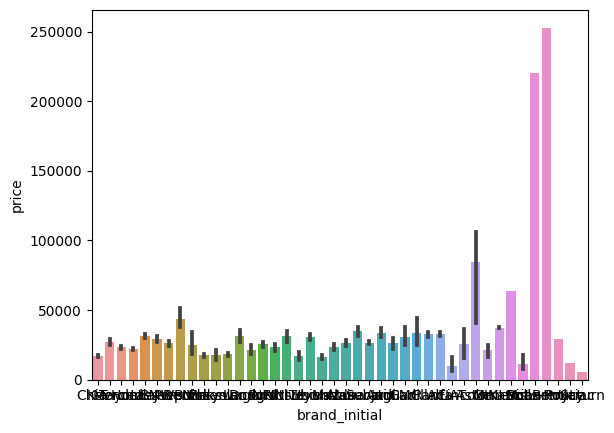

In [41]:
sns.barplot(df, x= 'brand_initial', y = 'price',)
plt.show()

We can see that price is changing by brands

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2840 non-null   object
 1   year           2840 non-null   int64 
 2   miles          2840 non-null   int64 
 3   price          2840 non-null   int64 
 4   accidents      2840 non-null   int64 
 5   owners         2840 non-null   int64 
 6   brand_initial  2840 non-null   object
dtypes: int64(5), object(2)
memory usage: 155.4+ KB


In [43]:
import datetime
current_year = datetime.datetime.now().year

In [44]:
df['age'] = current_year - df['year']

In [45]:
df['age'].unique()

array([ 3,  4,  5,  6,  7, 12,  9, 11,  8, 10, 13,  2, 14, 25,  1, 15, 18,
       16, 19, 17, 21, 23, 20, 22])

In [46]:
df['year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2013, 2016, 2014, 2017, 2015, 2012,
       2023, 2011, 2000, 2024, 2010, 2007, 2009, 2006, 2008, 2004, 2002,
       2005, 2003])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2840 non-null   object
 1   year           2840 non-null   int64 
 2   miles          2840 non-null   int64 
 3   price          2840 non-null   int64 
 4   accidents      2840 non-null   int64 
 5   owners         2840 non-null   int64 
 6   brand_initial  2840 non-null   object
 7   age            2840 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 177.6+ KB


# Train-Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df[['brand_initial', 'miles', 'accidents', 'owners', 'age']]
y= df['price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Target (Mean) Encoding by Brand Names

In [51]:
brand_mean_map = X_train.join(y_train).groupby('brand_initial')['price'].mean()

In [52]:
X_train['brand_encoded'] = X_train['brand_initial'].map(brand_mean_map)
X_test['brand_encoded'] = X_test['brand_initial'].map(brand_mean_map)

In [53]:
X_train.drop('brand_initial', axis=1, inplace=True)
X_test.drop('brand_initial', axis=1, inplace=True)

In [54]:
X_train.head()

,miles,accidents,owners,age,brand_encoded
1451,64053,1,2,6,23504.628159
39,36853,1,1,5,23504.628159
2069,34829,0,2,12,21029.571429
1866,23493,0,1,5,17479.853933
2314,245646,0,1,9,24918.704082


In [55]:
X_test.head()

,miles,accidents,owners,age,brand_encoded
1068,9620,0,1,4,28688.202797
2016,36151,0,1,3,26620.170213
317,57114,1,1,10,15670.263158
2045,6056,0,1,2,28688.202797
2279,14627,0,1,2,23504.628159


In [56]:
print(X_test['brand_encoded'].unique())
print(X_train['brand_encoded'].unique())

[28688.2027972  26620.17021277 15670.26315789 23504.62815884
 21529.42541436 17380.52747253 30199.88095238 32429.76086957
 18074.14285714 24918.70408163 32859.2625     25837.35064935
 17479.85393258 31722.26086957 31513.79116466 26478.41584158
 22496.         33224.66666667 32732.35       22494.125
 26556.28571429 22516.43243243 36028.16666667 45717.88235294
 21029.57142857 24688.33333333 17837.06666667 32611.8
 23069.14285714 29870.875      63728.         13497.
 37224.5                   nan 11347.5       ]
[ 23504.62815884  21029.57142857  17479.85393258  24918.70408163
  25837.35064935  32859.2625      26620.17021277  17380.52747253
  21529.42541436  32611.8         26478.41584158  24751.77777778
  17837.06666667  31513.79116466  28688.2027972   22494.125
  32429.76086957  32732.35        22516.43243243  23069.14285714
  36028.16666667  30199.88095238  15670.26315789  31722.26086957
  22496.          26556.28571429  29870.875       45717.88235294
  18074.14285714  33224.66666667  1

In [57]:
overall_mean = y_train.mean()
X_test['brand_encoded'].fillna(overall_mean, inplace=True)

/tmp/ipykernel_13/2255075146.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['brand_encoded'].fillna(overall_mean, inplace=True)


# Standard Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [60]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
dtr = DecisionTreeRegressor()

In [63]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [64]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [65]:
y_pred = dtr.predict(X_test)

In [66]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

R2 Score:  0.2315466447927923
MAE:  5620.48779342723
MSE:  165349384.25931144


In [67]:
from sklearn import tree

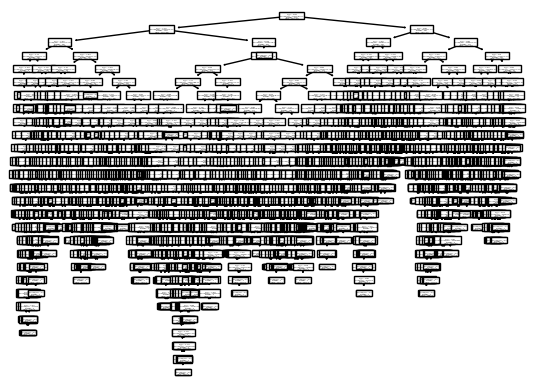

In [68]:
tree.plot_tree(dtr)
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
params = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth':[3,4,5,6,7,8,9,10,15,None],
    'max_features':['sqrt','log2',None]
}

In [71]:
grid = GridSearchCV(DecisionTreeRegressor(), params)

In [72]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']})

In [73]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': None,
 'splitter': 'best'}

In [74]:
grid.best_score_

0.5291229796254039

In [75]:
y_pred = grid.predict(X_test)

In [76]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

R2 Score:  0.35039558584618924
MAE:  5460.20352112676
MSE:  139776460.2947183


# K-Nearest Neighbor Regressor 

In [77]:
from sklearn.neighbors import KNeighborsRegressor

In [78]:
knn_reg = KNeighborsRegressor()

In [79]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [80]:
y_pred = knn_reg.predict(X_test)

In [81]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

R2 Score:  0.35725384590574893
MAE:  5703.98
MSE:  138300757.09132394


In [82]:
params = {
    'n_neighbors':[3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distancealgorithm'],
    'algorithm':['auto', 'ball_tree','kd_tree', 'brute'],
    'p':[1,2]
}

grid_knn = GridSearchCV(KNeighborsRegressor(), params, cv = 5)


In [83]:
warnings.filterwarnings('ignore')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distancealgorithm']})

In [84]:
grid_knn.best_score_

0.5273146678311298

In [85]:
grid_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

In [86]:
y_pred = grid_knn.predict(X_test)

In [87]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

R2 Score:  0.3716330192083981
MAE:  5632.598122065728
MSE:  135206766.49886975


# Support Vector Regressor

In [88]:
from sklearn.svm import SVR

In [89]:
svr = SVR()

In [90]:
svr.fit(X_train, y_train)

SVR()

In [91]:
y_pred = svr.predict(X_test)

In [92]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

R2 Score:  -0.021012932670186002
MAE:  8829.702320652854
MSE:  219693047.85231492


In [93]:
params = {
    'kernel':['linear', 'poly', 'rbf', ],
    'gamma':['scale', 'auto','kd_tree', 'brute'],
    'C':[3,5,10,100,1000]
}

grid_svr = GridSearchCV(SVR(), params, cv =5, verbose = 3, n_jobs=-1)

In [94]:
warnings.filterwarnings('ignore')
grid_svr.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 2/5] END ...C=3, gamma=scale, kernel=linear;, score=0.356 total time=   0.3s
[CV 2/5] END .....C=3, gamma=scale, kernel=poly;, score=0.104 total time=   0.3s
[CV 5/5] END ....C=3, gamma=scale, kernel=poly;, score=-0.003 total time=   0.3s
[CV 4/5] END ......C=3, gamma=scale, kernel=rbf;, score=0.003 total time=   0.4s
[CV 4/5] END ....C=3, gamma=auto, kernel=linear;, score=0.301 total time=   0.2s
[CV 3/5] END ......C=3, gamma=auto, kernel=poly;, score=0.016 total time=   0.3s
[CV 2/5] END .......C=3, gamma=auto, kernel=rbf;, score=0.029 total time=   0.3s
[CV 1/5] END ...C=3, gamma=kd_tree, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END ...C=3, gamma=kd_tree, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END ...C=3, gamma=kd_tree, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END ...C=3, gamma=kd_tree, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END ...C=3, gamma=kd_tree, kernel=line

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [3, 5, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 'kd_tree', 'brute'],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [95]:
y_pred = grid_svr.predict(X_test)
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

R2 Score:  0.3205478263761019
MAE:  5742.442106358054
MSE:  146198852.25443357


# Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
linear_reg = LinearRegression()

In [98]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred = linear_reg.predict(X_test)

In [100]:
y_pred = linear_reg.predict(X_test)
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

R2 Score:  0.34913306839268643
MAE:  6013.827648927473
MSE:  140048118.27127442


# Ridge Lasso ElasticNet

In [101]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [102]:
ridge = RidgeCV(cv = 5)
lasso = LassoCV(cv = 5)
elasticnet = ElasticNetCV(cv = 5)

In [103]:
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elasticnet.fit(X_train, y_train)

ElasticNetCV(cv=5)

In [104]:
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_elasticnet = elasticnet.predict(X_test)

In [105]:
print('---------Ridge---------')
print('R2 Score: ', r2_score(y_test, y_pred_ridge))
print('MAE: ', mean_absolute_error(y_test, y_pred_ridge))
print('MSE: ', mean_squared_error(y_test, y_pred_ridge))
print('---------Lasso---------')
print('R2 Score: ', r2_score(y_test, y_pred_lasso))
print('MAE: ', mean_absolute_error(y_test, y_pred_lasso))
print('MSE: ', mean_squared_error(y_test, y_pred_lasso))
print('---------ElasticNet---------')
print('R2 Score: ', r2_score(y_test, y_pred_elasticnet))
print('MAE: ', mean_absolute_error(y_test, y_pred_elasticnet))
print('MSE: ', mean_squared_error(y_test, y_pred_elasticnet))

---------Ridge---------
R2 Score:  0.3491385540229892
MAE:  6013.413711174
MSE:  140046937.91909468
---------Lasso---------
R2 Score:  0.34915090380328107
MAE:  6012.434403426667
MSE:  140044280.59636563
---------ElasticNet---------
R2 Score:  0.12177958862191329
MAE:  8149.137315301293
MSE:  188968143.9755965


# Conclusion

We are not able to create a fine machine learning algorithm by using these regression models on this dataset.